In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_df = pd.read_csv('clean_resume_data.csv')

In [3]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [4]:
clean_df.shape

(2484, 3)

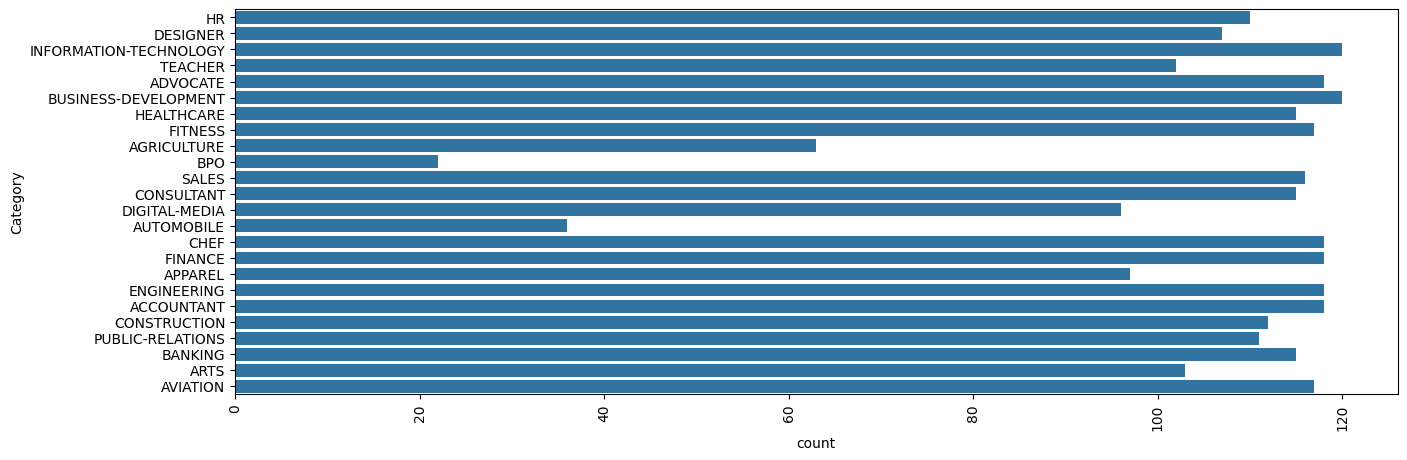

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)
plt.show()

In [6]:
from sklearn.utils import resample
max_count = clean_df['Category'].value_counts().max()

balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)
balanced_df = pd.concat(balanced_data)

In [7]:
balanced_df.dropna(inplace=True)

In [8]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

In [9]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.8611111111111112
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.95      0.85        21
              ADVOCATE       1.00      0.79      0.88        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.95      0.90      0.93        21
                  ARTS       0.93      0.64      0.76        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      0.97      0.94        30
               BANKING       1.00      0.70      0.82        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.50      0.61      0.55        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       1.00      0.71      0.83        31
              DESIGNER       0.93      0.93      0.93        28
         D

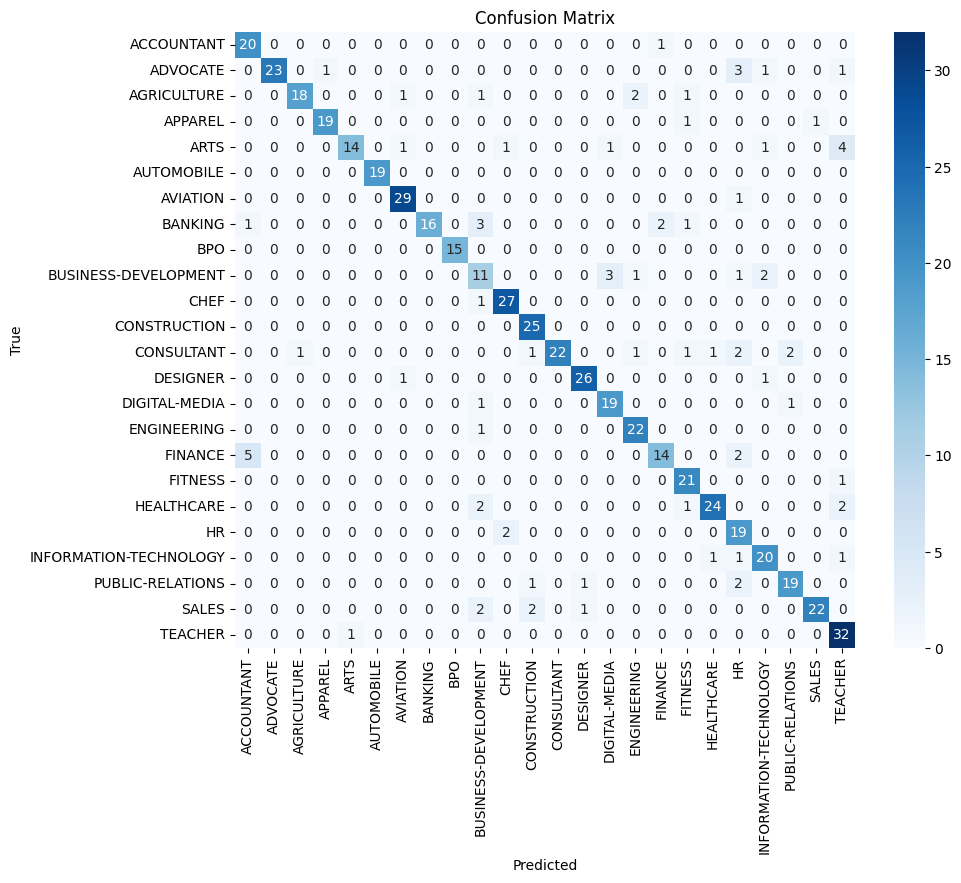

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
import re
def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt) 
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)  
    cleanText = re.sub(r'[' + re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""") + r']', ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText


def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [23]:
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [25]:
import pickle
pickle.dump(rf_classifier,open('rf_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_categorization.pkl','wb'))